**Lab assignment 1**

Notebook focused on how to implement and test additional heuristics, as well as on comparing heuristics.

This is the main notebook on which to develop and validate the additional heuristic functions requested for this lab assignment.

In [43]:
pip install matplotlib tabulate numpy

Note: you may need to restart the kernel to use updated packages.


In [44]:
import search
from search import *
import math

**Method implementing an additional heuristic**

In this case, the new heuristic is just multiplying by 2 the Manhattan distance. 

Manhattan distance computes the distance from  initial position to the last position, only moving vertically and horizontally (1 down + 2 right). 

THE ESTIMATION WON'T BE GREATER THAN THE REAL DISTANCE(admissibility property)

In [45]:
# New heuristic to be tested: 2 * Manhattan distance
def nueva_heuristica(state, end_state):
    """
    Heuristic multiplying by 2 the Manhattan distance
    """
    return 2 * getManhattanDistance(state, end_state)

In [55]:
# New heuristic to be implemented: Misplaced Tiles
# It counts every tile that is not in their final position. IT DOESN'T COMPUTE ANY DISTANCE, IT JUST CHECKS WHICH AREN'T IN THEIR FINAL POSITION
def misplaced_tiles(state, end_state):
    """
    Counts the number of misplaced tiles. 
    """
    tot = 0
    for i in range(0, len(state)): # for every tile in the square
        if state[i] != end_state[i] and state[i] != 0: 

            tot += 1
    return tot



In [47]:
# New heuristic to be implemented: A*Euclidean
def a_euclidean(state, end_state):
    """
    A-type search that uses the euclidean distance as a heristic function
    A* means that distance is calculated as f(n) = g(n)+d(n), where g() is the cost related to the depth of node n and d() is the heuristic distance(in this case, the euclidean)
    The euclidean distance is computed as the sum of the straight-line distances of each puzzle tile from its current position to the position it will occupy in the goal state 
        (aka. square root of the sum of the squares of the horizontal and vertical distances)
    d()=sqrt(vertical²+horizontal²)
    """
    # I think g(n) corresponds to the number of tiles that are between a number and its final position, in other words, vertical + horizontal
    
    """
    tot = 0
    columns = int(math.sqrt(len(state))) #The number of columns
    i = 0 # counter used for initial state
    for i in range(0, len(state)): # range includes the first argument but excludes the last one
        if state[i] != end_state[i]:
            for search in range(0, len(state)):
                if state[i] == end_state[search]: 
                    # if we found it, we must calculate the coordinates of the initial number and its final position
                    searchX = search % columns
                    searchY = search / columns
                    initX = i % columns
                    initY = i / columns
                    # now we calculate the number of vertical movements and horizontal movements
                    horizontal = math.abs(searchX - initX)
                    vertical = math.abs(searchY - initY)
                    # with those values, we obtain the g(n) and h(n) that we will add to the total cost
                    g = vertical + horizontal
                    h = math.sqrt(vertical*vertical + horizontal*horizontal)
                    tot += g + h
                    
                    break # we don't want to keep looking for the end position. We exit this loop and keep our analysis
        #End if
        
    return tot
    """

    # ALTHOUGH IT IS AN A* ALGORITHM, THIS IS NOT REALLY THAT ALGORITHM, AS WE ARE NOT CALCULATING g(n)
    # This is really what the practice wants... :/

    tot = 0
    size =  int(math.sqrt(len(state)))

    for i in range(1, len(state)):
        goal = end_state.index(i) # Obtains the position of tile in the goal state
        goalX = goal // size
        goalY = goal % size
        idx = state.index(i) # Obtains the position of tile in the initial state
        initX = idx // size
        initY = idx % size
        horizontal = abs(goalX - initX)
        vertical = abs(goalY - initY)
        h = math.sqrt(horizontal*horizontal + vertical*vertical)
        tot += h
    
    return tot




In [48]:
# New heuristic to be implemented: rows_columns
# for each tile on the board, if the tile is not in its correct goal row, 1
# point is added; if the tile is not in its correct goal column, 1 point is added. Therefore, the
# minimum value of this heuristic for a tile is 0 (when the tile is correctly placed in its goal position),
# while the maximum value is 2 (when neither the row nor the column of the tile’s position are
# equal to the value of the row and column in the goal position).

def rows_columns(state, end_state):
    """
    Counts the number of misplaced tiles. We add 1 if it coincides in row or column or 2 if it doesn't coincide in neither of them
    """
    tot = 0
    columns = int(math.sqrt(len(state))) # The number of columns
    
    for i in range(0, len(state)): # for every tile in the square
        if state[i] != end_state[i]:
            for search in range(0, len(state)):
                if state[i] == end_state[search]:
                    initRow = i / columns
                    initColumn = i % columns

                    finalRow = search / columns
                    finalColumn = search % columns

                    if initRow != finalRow:
                        tot+=1
                    if initColumn != finalColumn:
                        tot+=1

                    break

    return tot

In [ ]:
# New heuristic to be implemented: A*Euclidean + LC
# 
# 
# 

**Methods to simplify the execution of the algorithms available**

Let's include the new heuristic

In [49]:
# Auxiliary methods to execute the algorithms

def run_algorithm(algorithm_name, initial_state, end_state, size, depth=50, heuristic_func=None):
    """
    Executes the algorithm specified by its name and returns its results.
    Returns:
        dict: Dictionary with the results of the algorithm, or None if an error occurs
    """
    solution_data = None

    if algorithm_name == 'BFS':
        solution_data = graphSearch(initial_state, end_state, lambda x: 1, lambda s, es: 0, size)
        print("BFS executed")

    elif algorithm_name == 'DFS (Graph Search)':
        solution_data = graphSearch(initial_state, end_state, lambda x: -1, lambda s, es: 0, size, maximum_depth=depth)
        print("DFS (Graph Search) executed")

    elif algorithm_name == 'DFS-B':
        results_dict, _ = DFS_B(initial_state, end_state, size=size, maximum_depth=depth)
        solution_data = results_dict
        print("DFS-B executed")

    elif algorithm_name == 'Voraz (Manhattan)':  # Greedy (Manhattan)
        manhattan_h_search = lambda s, es_local=end_state: getManhattanDistance(s, es_local)
        solution_data = graphSearch(initial_state, end_state, lambda x: 0, manhattan_h_search, size)
        print("Voraz (Manhattan) executed")

    elif algorithm_name == 'ID':
        solution_data = ID_B(initial_state, end_state, size=size)
        print("ID executed")

    elif algorithm_name == 'A* (Manhattan)':
        manhattan_h_search = lambda s, es_local=end_state: getManhattanDistance(s, es_local)
        solution_data = graphSearch(initial_state, end_state, lambda x: 1, manhattan_h_search, size)
        print("A* (Manhattan) executed")

    elif algorithm_name == 'A (MD + LC)':
        md_lc_h_search = lambda s, es_local=end_state: get_md_plus_linear_conflict(s, es_local)
        solution_data = graphSearch(initial_state,end_state,  lambda x: 1, md_lc_h_search, size)
        print("A (Manhattan + Linear_conflict) executed")

    elif algorithm_name == 'IDA* (Manhattan)':
        manhattan_h_search = lambda s, es_local=end_state: getManhattanDistance(s, es_local)
        solution_data = IDA_B(initial_state, end_state, size, manhattan_h_search)
        print("IDA* (Manhattan) executed")

    ################################################################################################
    # we add the new heuristic
    ################################################################################################

    elif algorithm_name == 'Nueva Heurística':
        solution_data = graphSearch(initial_state, end_state, lambda x: 1, 
                                    lambda s, es: nueva_heuristica(s, end_state), size)
        print("Nueva heuristica executed")

    elif algorithm_name == 'Misplaced tiles':
        solution_data = graphSearch(initial_state, end_state, lambda x: 1, 
                                    lambda s, es: misplaced_tiles(s, end_state), size)
        print("Misplaced tiles executed")
    
    elif algorithm_name == 'Rows Columns':
        solution_data = graphSearch(initial_state, end_state, lambda x:1, 
                                    lambda s, es: rows_columns(s, end_state), size)
        print("Rows Columns executed")
    elif algorithm_name == 'A* Euclidean':
        solution_data = graphSearch(initial_state, end_state, lambda x:1, 
                                    lambda s, es: a_euclidean(s, end_state), size)
        print("A*Euclidean executed")

    
    ################################################################################################


    else:
        print(f"Algorithm {algorithm_name} not found!")
        return None

    if solution_data:
        if not solution_data['path'] or len(solution_data['path']) == 0:
            print(f"No solution found for {algorithm_name}")
        return {algorithm_name: solution_data}
    else:
        print(f"No solution data returned for {algorithm_name}")
        return {algorithm_name: {}}  # Return empty dict for the algorithm


def run_all_algorithms(initial_state, end_state, size, depth = 50):
    """
    Executes all the algorithms defined and returns their results.
    Returns:
        dict: Dictionary with the results of all the algorithms executed
    """
    algorithms = [
        'BFS',
        'DFS-B',
        'Voraz (Manhattan)',  # Greedy (Manhattan)
        'ID',
        'A* (Manhattan)',
        'A (MD + LC)',
        'IDA* (Manhattan)',
        'Nueva Heurística',           ###   WE ADD THE LABEL FOR THE NEW HEURISTIC TO THE LIST
        'Misplaced tiles',
        'Rows Columns',
        'A* Euclidean',
    ]

    results = {}
    seen_algos = set()
    for algo in algorithms:
        if algo not in seen_algos:
            seen_algos.add(algo)
            algo_result = run_algorithm(algo, initial_state, end_state, size, depth)
            if algo_result and algo in algo_result:
                results[algo] = algo_result[algo]

    return results


**Example with size 3**

We define the initial state and the goal state, we run all the algorithms available, and we display the results.

BFS executed
DFS-B executed
Voraz (Manhattan) executed
ID executed
A* (Manhattan) executed
A (Manhattan + Linear_conflict) executed
IDA* (Manhattan) executed
Nueva heuristica executed
Misplaced tiles executed
Rows Columns executed
A*Euclidean executed
+-------------------+--------+---------+-------------+-------------------+------------------+--------------------+
| Algorithm         |   Cost |   Depth |    Time (s) |   Nodes Generated |   Nodes Expanded |   Max Nodes Stored |
+===================+========+=========+=============+===================+==================+====================+
| BFS               |     22 |      22 | 0.680889    |            233687 |            86871 |             110729 |
+-------------------+--------+---------+-------------+-------------------+------------------+--------------------+
| DFS-B             |     38 |      40 | 2.31449     |           2028383 |          1301341 |                 41 |
+-------------------+--------+---------+-------------+----

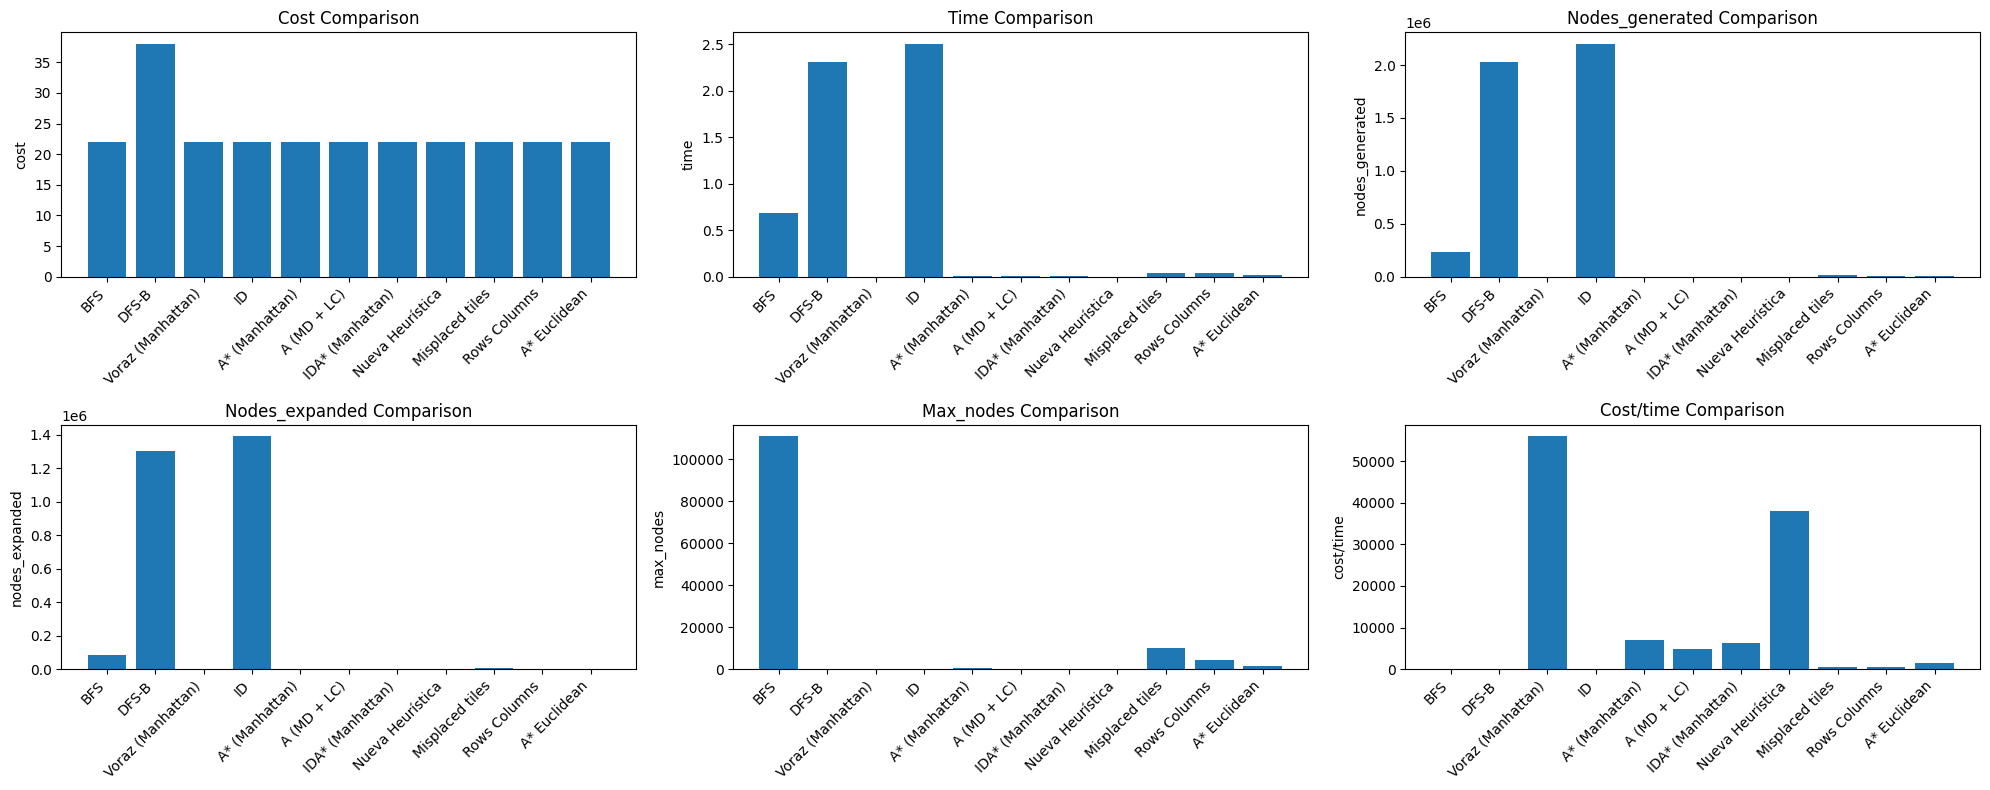

In [56]:
# Size 3

size = 3  # Example for a 3x3 puzzle

initial_state_matrix = [
    [7, 8, 1],
    [4, 0, 6],
    [2, 3, 5]
]


end_state_matrix = [
    [1, 2, 3],
    [8, 0, 4],
    [7, 6, 5]
]

# Convert the matrix into a one-dimensional list
initial_state = [num for row in initial_state_matrix for num in row]
# Convert the matrix into a one-dimensional list
end_state = [num for row in end_state_matrix for num in row]

# Run all of the algorithms and show the results as a table
results = {}
if isSolvable(initial_state, end_state):
    # Calling the function that runs all the algorithms
    results = run_all_algorithms(initial_state, end_state, size, 40)
    show_results(results)
    plot_algorithm_comparison(results)
else:
    print("The puzzle is not solvable.")




**Question**

How does the new heuristic behave?  Is it A*?  Can you be sure about that?





**Reply:**
To check if one heuristic is admissible, we have to check whether there is an example where the estimated distance is greater than the real one. For example, the New Heuristic would NOT be an admissible heursitic, as it computes estimated distances that are larger than the real one. Even though, this heuristic provides good cost execution time.


**Now try with size 4**

In [51]:
 # Size 4

size = 4
initial_state_matrix = [
    [13, 2, 10, 3],
    [1, 12, 8, 4],
    [5, 0, 9, 6],
    [15, 14, 11, 7]
]


end_state_matrix = [
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 0]
]

# Convert the matrix into a one-dimensional list
initial_state = [num for row in initial_state_matrix for num in row]
# Convert the matrix into a one-dimensional list
end_state = [num for row in end_state_matrix for num in row]

# Run some specific algorithms, including the new heuristic
results = {}
if isSolvable(initial_state, end_state):
    # Calling the function to run the algorithms
    algo_result = run_algorithm('A* (Manhattan)', initial_state, end_state, size)
    results.update(algo_result)

    algo_result = run_algorithm('Voraz (Manhattan)', initial_state, end_state, size)
    results.update(algo_result)

    algo_result = run_algorithm('Nueva Heurística', initial_state, end_state, size)
    results.update(algo_result)

    show_results(results)
else:
    print("The puzzle is not solvable.")


A* (Manhattan) executed
Voraz (Manhattan) executed
Nueva heuristica executed
+-------------------+--------+---------+------------+-------------------+------------------+--------------------+
| Algorithm         |   Cost |   Depth |   Time (s) |   Nodes Generated |   Nodes Expanded |   Max Nodes Stored |
+===================+========+=========+============+===================+==================+====================+
| A* (Manhattan)    |     41 |      41 |  6.16544   |            645273 |           215568 |             403054 |
+-------------------+--------+---------+------------+-------------------+------------------+--------------------+
| Voraz (Manhattan) |    111 |     111 |  0.0395656 |              4983 |             1594 |               3277 |
+-------------------+--------+---------+------------+-------------------+------------------+--------------------+
| Nueva Heurística  |     47 |      47 |  1.09558   |            121708 |            35397 |              72042 |
+----------

**Question**

What do you think now?

**Answer**

.

**Example with size 5**

In [52]:
# Size 5

size = 5
initial_state_matrix = [
  [1, 2, 3, 4, 5],
  [6, 7, 8, 9, 10],
  [0, 12, 13, 14, 15],
  [16, 17, 18, 19, 20],
  [21, 22, 24, 23, 11]
]

end_state_matrix = [
  [1, 2, 3, 4, 5],
  [6, 7, 8, 9, 10],
  [11, 12, 13, 14, 15],
  [16, 17, 18, 19, 20],
  [21, 22, 23, 24, 0]
]

# Convert the matrix into a one-dimensional list
initial_state = [num for row in initial_state_matrix for num in row]
# Convert the matrix into a one-dimensional list
end_state = [num for row in end_state_matrix for num in row]

# Running a few specific algorithms
results = {}
if isSolvable(initial_state, end_state):
    # Calling the function to run the algorithms
    algo_result = run_algorithm('A* (Manhattan)', initial_state, end_state, size)
    results.update(algo_result)

    algo_result = run_algorithm('Voraz (Manhattan)', initial_state, end_state, size)
    results.update(algo_result)

    algo_result = run_algorithm('Nueva Heurística', initial_state, end_state, size)
    results.update(algo_result)

    show_results(results)

else:
    print("The puzzle is not solvable.")



A* (Manhattan) executed
Voraz (Manhattan) executed
Nueva heuristica executed
+-------------------+--------+---------+------------+-------------------+------------------+--------------------+
| Algorithm         |   Cost |   Depth |   Time (s) |   Nodes Generated |   Nodes Expanded |   Max Nodes Stored |
+===================+========+=========+============+===================+==================+====================+
| A* (Manhattan)    |     30 |      30 |  3.00254   |            182180 |            55355 |             121598 |
+-------------------+--------+---------+------------+-------------------+------------------+--------------------+
| Voraz (Manhattan) |    138 |     138 |  0.0811133 |              5718 |             1688 |               3985 |
+-------------------+--------+---------+------------+-------------------+------------------+--------------------+
| Nueva Heurística  |     30 |      30 |  0.189574  |             13130 |             3871 |               8823 |
+----------

**Now try size n, auto-generating initial and goal states**

Here we consider how to generalize to n the size of the puzzle.

Initial state:

 1  6  4
    3  5
 7  8  2

End state:

 1  2  3
 4  5  6
 7  8   

Voraz (Manhattan) executed
A* (Manhattan) executed
A (Manhattan + Linear_conflict) executed
Nueva heuristica executed
+-------------------+--------+---------+------------+-------------------+------------------+--------------------+
| Algorithm         |   Cost |   Depth |   Time (s) |   Nodes Generated |   Nodes Expanded |   Max Nodes Stored |
+===================+========+=========+============+===================+==================+====================+
| Voraz (Manhattan) |     53 |      53 | 0.0060904  |              1327 |              486 |                812 |
+-------------------+--------+---------+------------+-------------------+------------------+--------------------+
| A* (Manhattan)    |     21 |      21 | 0.00704575 |              1608 |              602 |                951 |
+-------------------+--------+---------+------------+-------------------+------------------+--------------------+


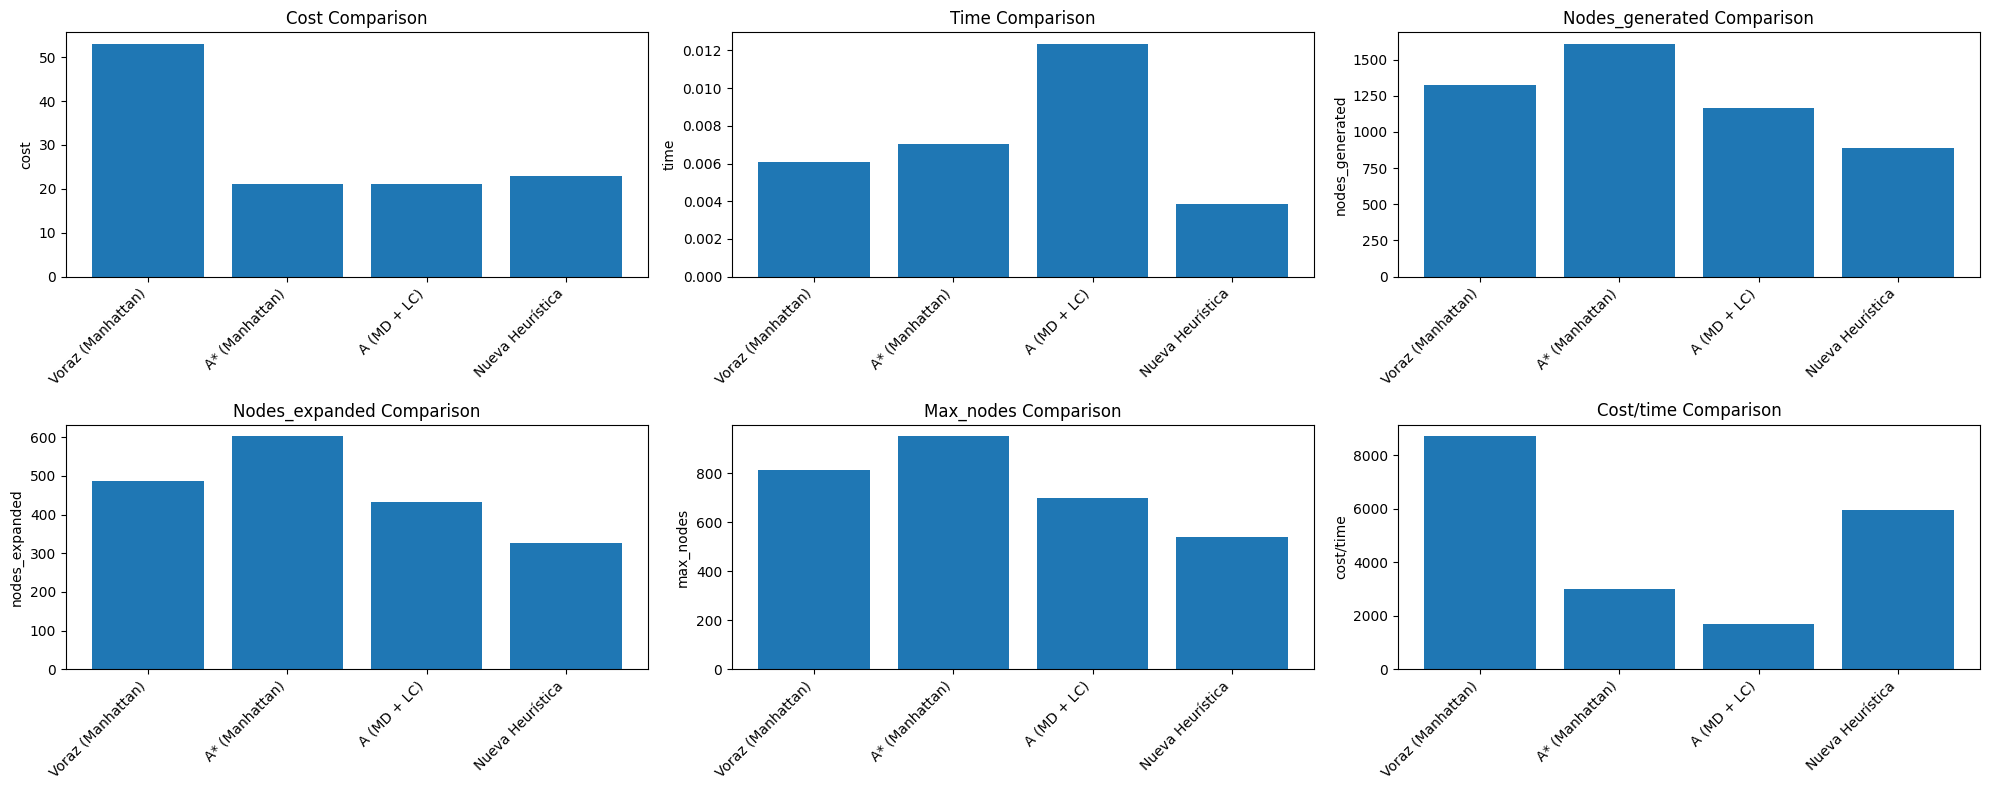

In [53]:
# Try with size n, auto-generating initial and goal states
size = 3
end_state = generate_ordered_state(size)
#end_state = generate_spiral_state(size)
initial_state = generate_random_state(size, end_state)


print("Initial state:\n")
visualize_state(initial_state)

print("\nEnd state:\n")
visualize_state(end_state)

# Running some specific algorithms
results = {}

print()
alg_results = run_algorithm('Voraz (Manhattan)', initial_state, end_state, size)
results.update(alg_results)
alg_results = run_algorithm('A* (Manhattan)', initial_state, end_state, size)
results.update(alg_results)
alg_results = run_algorithm('A (MD + LC)', initial_state, end_state, size)
results.update(alg_results)
algo_result = run_algorithm('Nueva Heurística', initial_state, end_state, size)
results.update(algo_result)

show_results(results)
plot_algorithm_comparison(results)

#show_path_for_algorithm(results, 'A (MD + LC)', size)